In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
df = pd.read_excel('Projetos - Jupiter/Clustering Project/online_retail_II.xlsx')
df_copy = df.copy()

In [3]:
df_copy.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df_copy.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


#### InvoiceNo:
Um número integral de 6 dígitos atribuído exclusivamente a cada transação. Se este código começa com a letra 'c', indica um cancelamento. 

In [6]:
df_copy['Invoice'] = df_copy['Invoice'].astype('str')
df_copy[df_copy['Invoice'].str.match('^\\d{6}$') == True].shape

(515252, 8)

In [7]:
df_copy['Invoice'] = df_copy['Invoice'].astype('str')
df_copy['Invoice'].str.replace('[0-9]','', regex= True).unique()

array(['', 'C', 'A'], dtype=object)

In [8]:
df_copy[df_copy['Invoice'].str.startswith('A') == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


#### StockCode:
Um número integral de 5 dígitos atribuído exclusivamente a cada produto distinto. 

In [9]:
df_copy.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
# Verificando valores com 5 números
df_copy['StockCode'] = df_copy['StockCode'].astype('str')
df_copy[df_copy['StockCode'].str.match('^\\d{5}$') == True].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [11]:
# Verificando valores com 5 números com letra no final
df_copy['StockCode'] = df_copy['StockCode'].astype('str')
df_copy[df_copy['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == True].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom


In [12]:
df_copy['StockCode'] = df_copy['StockCode'].astype('str')
df_copy['StockCode'].str.replace('[0-9]','',regex = True).unique()

array(['', 'P', 'W', 'C', 'B', 'F', 'L', 'S', 'A', 'N', 'POST', 'E', 'J',
       'D', 'G', 'LP', 'BL', 'K', 'H', 'GR', 'M', 'DCGS', 'DOT', 'U', 'b',
       'w', 'c', 'a', 'f', 'bl', 's', 'p', 'R', 'V', 'T', 'I',
       'BANK CHARGES', 'O', 'Z', 'TEST', 'gift__', 'DCGSN', 'm', 'PADS',
       'Y', 'HC', 'e', 'd', 'ADJUST', 'DCGSSGIRL', 'GIFT', 'DCGSLBOY',
       'k', 'g', 'DCGSSBOY', 'DCGSLGIRL', 'j', 'l', 'n', 'J ', 'SP',
       'AMAZONFEE'], dtype=object)

In [13]:
# Aplicando 
df_copy['StockCode'] = df_copy['StockCode'].astype('str')
df_copy[df_copy['StockCode'].str.match('^PADS') == True].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583.0,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408.0,United Kingdom


#### Aplicando as Condições

In [14]:
# Aplicando as alterações no novo dataset
tratamento_df = df.copy()
tratamento_df['Invoice'] = tratamento_df['Invoice'].astype('str')

mask = (
    tratamento_df['Invoice'].str.match('^\\d{6}$') == True
)

tratamento_df = tratamento_df[mask]

In [15]:
tratamento_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [16]:
tratamento_df.dropna(subset= 'Customer ID', inplace=True)

In [17]:
tratamento_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407695.000000,407695,407695.000000,407695.000000
mean,13.586686,2010-07-01 10:10:10.782177792,3.294188,15368.504107
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000
50%,5.000000,2010-07-09 15:46:00,1.950000,15321.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000
std,96.842229,NaN,34.756655,1679.795700


In [18]:
tratamento_df['StockCode'] = tratamento_df['StockCode'].astype('str')

mask = (
    (tratamento_df['StockCode'].str.match('^\\d{5}$') == True) |
    (tratamento_df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == True) |
    (tratamento_df['StockCode'].str.contains('^PADS') == True)
)

tratamento_df = tratamento_df[mask]

#### Valor Total

In [19]:
tratamento_df['ValorTotal'] = tratamento_df['Price'] * tratamento_df['Quantity']

#### Fazendo o agregamento da base

In [20]:
agregado_df = tratamento_df.groupby('Customer ID', as_index= False) \
             .agg(
                 ValorMonetario = ('ValorTotal', 'sum'),
                 FrequenciaUso = ('Invoice', 'nunique'),
                 UltimoUso = ('InvoiceDate', 'max')
             )

#### Ultima compra recente

In [21]:
agregado_df['Recente'] = (agregado_df['UltimoUso'].max() - agregado_df['UltimoUso']).dt.days

In [22]:
agregado_df.head()

,Customer ID,ValorMonetario,FrequenciaUso,UltimoUso,Recente
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


In [23]:
agregado_df.describe()

,Customer ID,ValorMonetario,FrequenciaUso,UltimoUso,Recente
count,4285.000000,4285.000000,4285.000000,4285,4285.000000
mean,15356.806768,2024.126801,4.426138,2010-09-11 00:06:10.431738624,89.548191
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13891.000000,307.560000,1.000000,2010-07-27 14:39:00,17.000000
50%,15362.000000,702.900000,2.000000,2010-10-19 12:10:00,51.000000
75%,16840.000000,1704.290000,5.000000,2010-11-22 11:24:00,135.000000
max,18287.000000,349164.350000,183.000000,2010-12-09 20:01:00,373.000000
std,1699.839258,8813.945538,7.938017,NaN,96.359872


#### Detectando Outliers na base

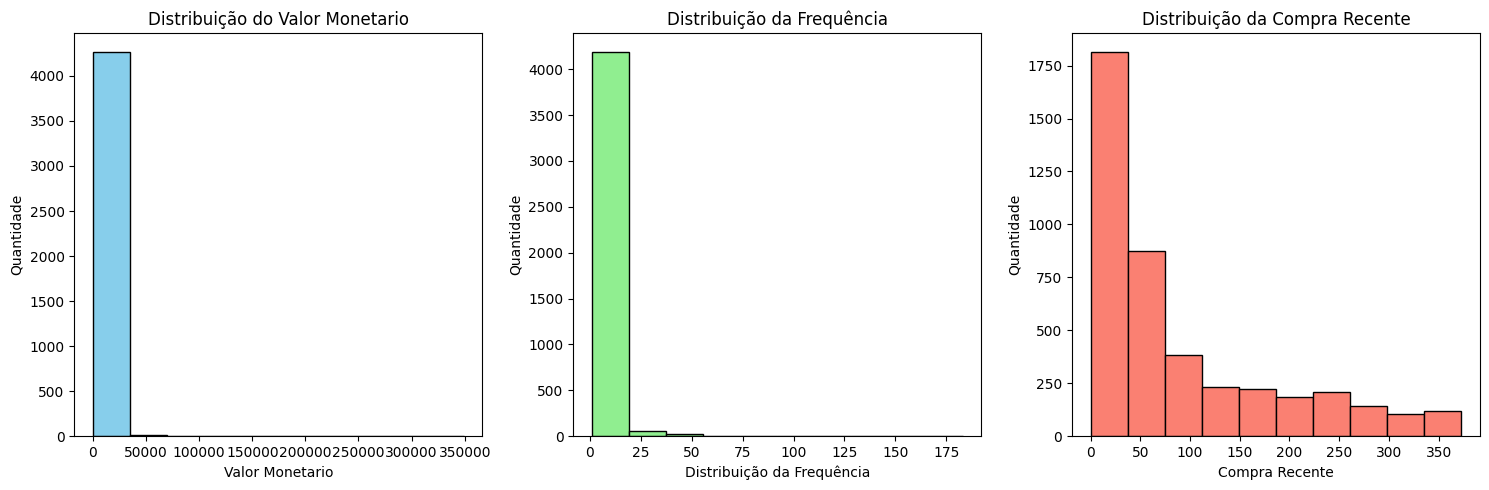

In [49]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(agregado_df['ValorMonetario'], bins= 10, color= 'skyblue',edgecolor = 'black')
plt.title('Distribuição do Valor Monetario')
plt.xlabel('Valor Monetario')
plt.ylabel('Quantidade')

plt.subplot(1,3,2)
plt.hist(agregado_df['FrequenciaUso'], bins= 10, color = 'lightgreen', edgecolor = 'black')
plt.title('Distribuição da Frequência')
plt.xlabel('Distribuição da Frequência')
plt.ylabel('Quantidade')

plt.subplot(1,3,3)
plt.hist(agregado_df['Recente'], bins = 10, color = 'salmon', edgecolor = 'black')
plt.title('Distribuição da Compra Recente')
plt.xlabel('Compra Recente')
plt.ylabel('Quantidade')

plt.tight_layout()
plt.show()

#### Criando Boxplot para verificar a disperção dos dados

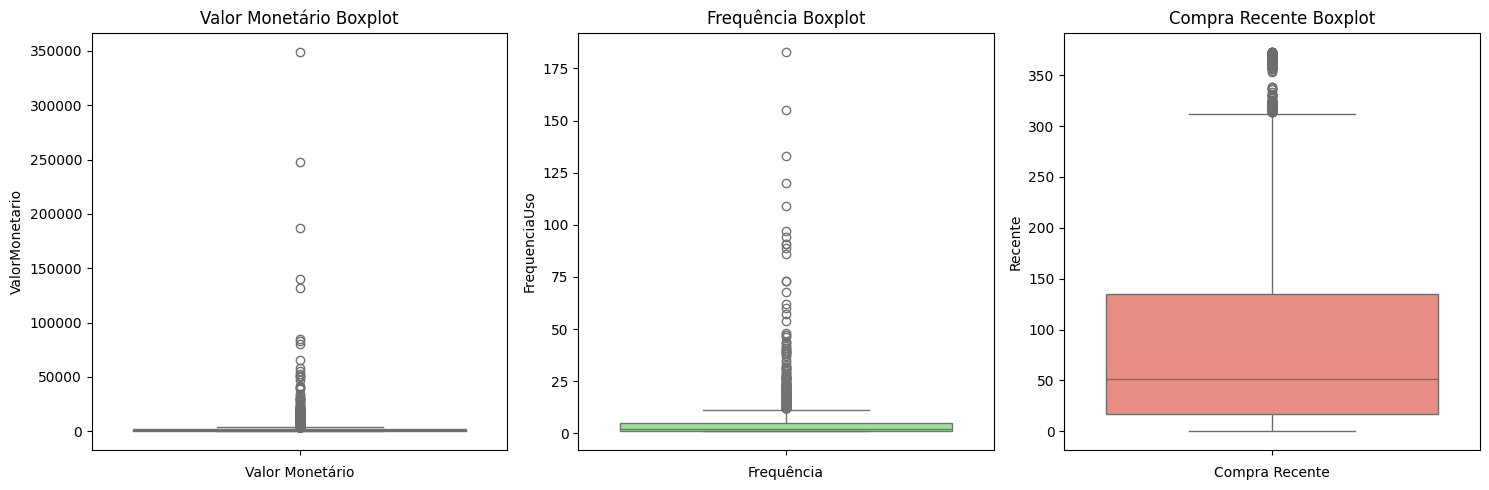

In [57]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=agregado_df['ValorMonetario'], color='skyblue')
plt.title('Valor Monetário Boxplot')
plt.xlabel('Valor Monetário')

plt.subplot(1,3,2)
sns.boxplot(data=agregado_df['FrequenciaUso'], color='lightgreen')
plt.title('Frequência Boxplot')
plt.xlabel('Frequência')

plt.subplot(1,3,3)
sns.boxplot(data=agregado_df['Recente'], color='salmon')
plt.title('Compra Recente Boxplot')  # Correção aqui
plt.xlabel('Compra Recente')

plt.tight_layout()
plt.show()


#### Aplicando a Regra do Intervalo Interquartil

In [26]:
qt1_Monetario = agregado_df['ValorMonetario'].quantile(0.25)
qt3_Monetario = agregado_df['ValorMonetario'].quantile(0.75)
iqr_Monetario = qt3_Monetario - qt1_Monetario

In [27]:
ValorMonetario_BoxPlot = agregado_df[(agregado_df['ValorMonetario'] > (qt3_Monetario + 1.5 * iqr_Monetario)) | \
(agregado_df['ValorMonetario'] < (qt1_Monetario - 1.5 * iqr_Monetario))].copy()

In [28]:
qt1_Frequencia = agregado_df['FrequenciaUso'].quantile(0.25)
qt3_Frequencia = agregado_df['FrequenciaUso'].quantile(0.75)
iqr_frequencia = qt3_Frequencia - qt1_Frequencia

In [29]:
FrequenciaUso_BoxPlot = agregado_df[(agregado_df['FrequenciaUso'] > (qt3_Frequencia + 1.5 * iqr_frequencia)) | \
(agregado_df['FrequenciaUso'] < (qt1_Frequencia - 1.5 * iqr_frequencia))].copy()

In [30]:
No_Outliers = agregado_df[(~agregado_df.index.isin(ValorMonetario_BoxPlot.index)) & (~agregado_df.index.isin(FrequenciaUso_BoxPlot.index))]

In [31]:
No_Outliers.describe()

,Customer ID,ValorMonetario,FrequenciaUso,UltimoUso,Recente
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502197,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672283,2.243748,NaN,98.111495


#### Validando o Gráfico, após aplicar a Regra do Intervalo Interquartil

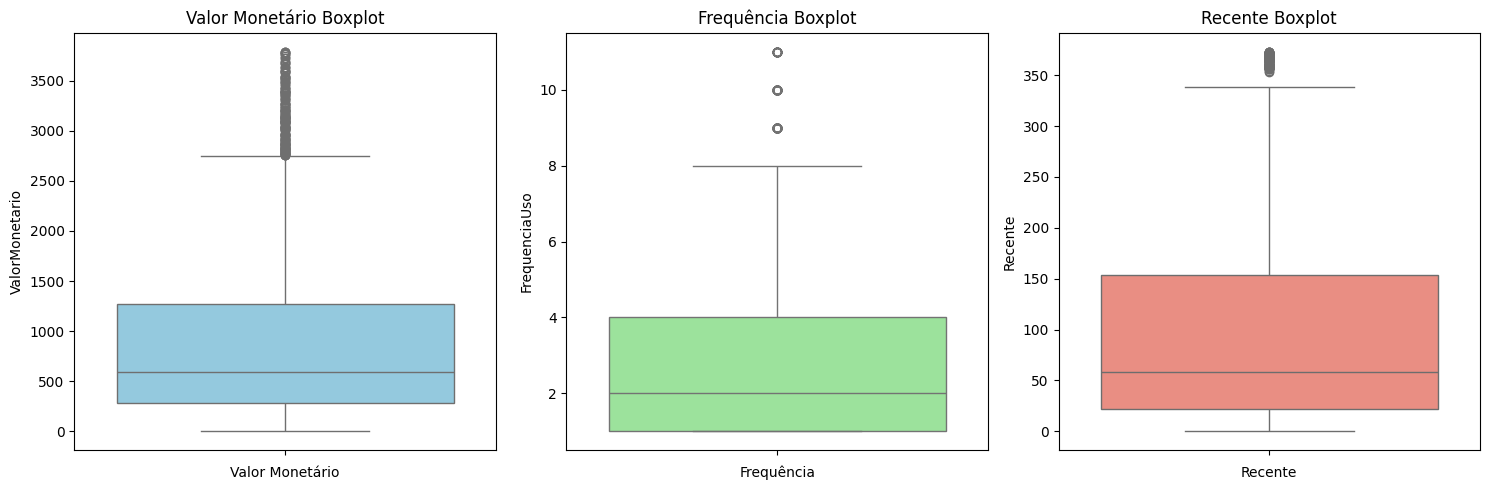

In [56]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=No_Outliers['ValorMonetario'], color='skyblue')
plt.title('Valor Monetário Boxplot')
plt.xlabel('Valor Monetário')

plt.subplot(1,3,2)
sns.boxplot(data=No_Outliers['FrequenciaUso'], color='lightgreen')
plt.title('Frequência Boxplot')
plt.xlabel('Frequência')

plt.subplot(1,3,3)
sns.boxplot(data=No_Outliers['Recente'], color='salmon')
plt.title('Recente Boxplot')
plt.xlabel('Recente')

plt.tight_layout()
plt.show()

#### Padronizando valores da base

In [33]:
scaler = StandardScaler()

scaler_df = scaler.fit_transform(No_Outliers[['ValorMonetario', 'FrequenciaUso', 'Recente']])

scaler_data_df = pd.DataFrame(data = scaler_df, index = No_Outliers.index, columns= ('ValorMonetario', 'FrequenciaUso', 'Recente'))

#### Qual o melhor ponto do Clusters que podemos aplicar

C:\Users\sidne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sidne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sidne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sidne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

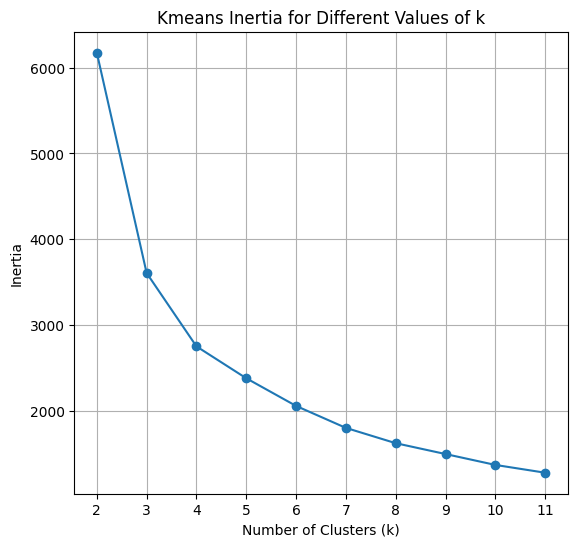

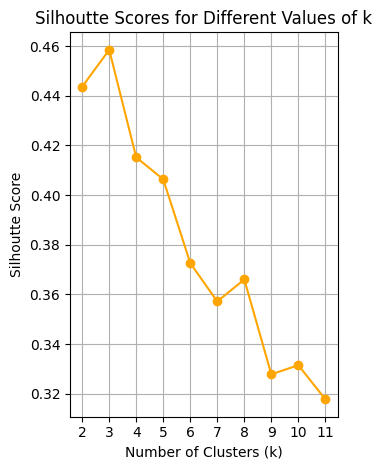

In [34]:
max_k = 12
k_values = range(2,max_k)

inertia = []
silhoutte_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42, max_iter = 1000)
    cluster_label = kmeans.fit_predict(scaler_data_df)
    sil_score = silhouette_score(scaler_data_df,cluster_label)
    silhoutte_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (14,6))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker = 'o')
plt.title('Kmeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

plt.subplot(1,2,2)
plt.plot(k_values, silhoutte_scores, marker = 'o', color = 'orange')
plt.title('Silhoutte Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhoutte Score')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Melhor que encontramos foi o número 4, pois onde queda começa a se estabilizar

In [35]:
KMeans = KMeans(n_clusters= 4, max_iter=1000, random_state=42)
KMeans_cluster = KMeans.fit_predict(scaler_data_df)

C:\Users\sidne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
KMeans_cluster

array([3, 0, 2, ..., 3, 0, 0])

In [43]:
No_Outliers['clusters'] = KMeans_cluster

C:\Users\sidne\AppData\Local\Temp\ipykernel_7676\3709733386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  No_Outliers['clusters'] = KMeans_cluster


In [44]:
No_Outliers

,Customer ID,ValorMonetario,FrequenciaUso,UltimoUso,Recente,clusters
0,12346.0,169.36,2,2010-06-28 13:53:00,164,3
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,3
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111,0


#### Verificando o modelo 

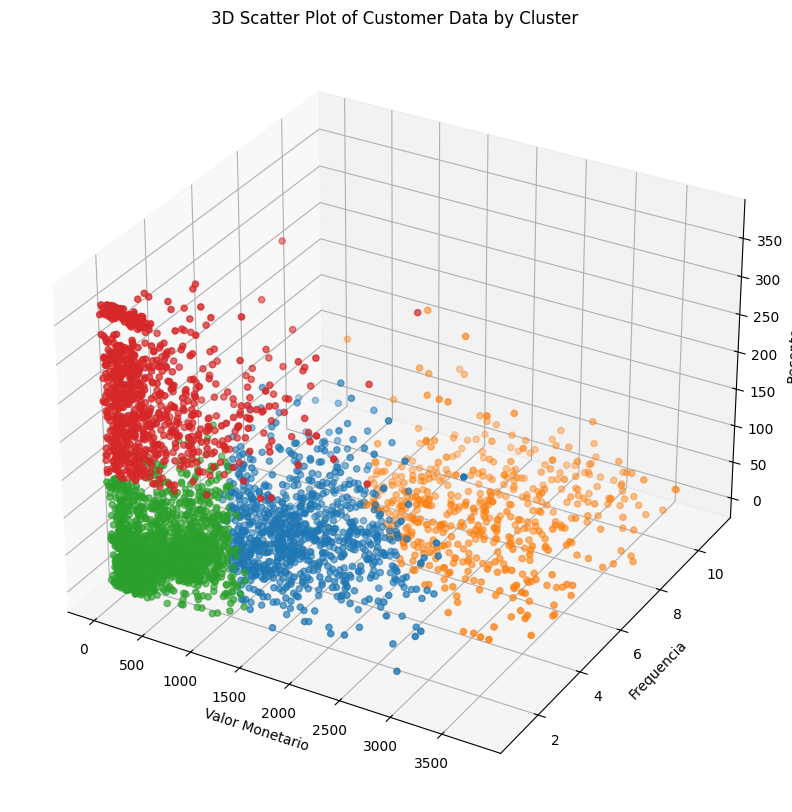

In [47]:
cluster_colors = {
    0:'#1f77b4', #Blue
    1:'#ff7f0e', #Orange
    2:'#2ca02c', #Green
    3:'#d62728'  #Red
}

colors = No_Outliers['clusters'].map(cluster_colors)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(No_Outliers['ValorMonetario'],
                     No_Outliers['FrequenciaUso'],
                     No_Outliers['Recente'], 
                     c= colors,
                     marker= 'o')
ax.set_xlabel('Valor Monetario')
ax.set_ylabel('Frequencia')
ax.set_zlabel('Recente')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

🔴 Vermelho: Clientes que realizaram compras recentemente, mas com baixa frequência e baixo valor monetário. Possivelmente novos clientes que ainda não engajaram totalmente.

🟢 Verde: Clientes com baixa frequência de compras, baixo valor monetário e compras não recentes. Provavelmente são clientes inativos ou com pouco envolvimento.

🔵 Azul: Grupo moderado, com frequência e valor monetário razoáveis, mas com compras não tão recentes. São clientes medianos que podem ser reativados com campanhas.

🟠 Laranja: Clientes com alto valor monetário e boa frequência de compras, mas que não compram há algum tempo. São clientes valiosos que merecem atenção para reativação.